In [2]:
!pip install pandasql

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 1.6/1.6 MB 3.9 MB/s eta 0:00:00
     ------------------------------------- 190.7/190.7 kB 12.0 MB/s eta 0:00:00
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26768 sha256=146b8bacba57b3f66d7fbca7d89685fdd6aa94d71f4055d11c1ea3c29581df2d
  Stored in directory: c:\users\alson\appdata\local\pip\cache\wheels\63\e8\ec\75b1df467ecf57b6ececb32cb16f4e86697cbfe55cb0c51f07
Successfully built pandasql


In [3]:
import pandas as pd
import numpy as np
import pandasql as ps
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV, KFold, train_test_split, StratifiedKFold
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Loading Datasets

## Earning Calls

In [4]:
earning_call = pd.read_csv('../data/datafiles/final_earningcalls_sentiment.csv', index_col = 0)


In [5]:
earning_call 

,Unnamed: 0.1,Unnamed: 0,Stock,Content,Title,Date,Conference,QnA,Questions,Questions Sentiment,Conference Sentiment,Has_QnA
0,0,0,AMD,"<p>Call Start: 17:30 January 1, 0000 6:26 PM E...",Advanced Micro Devices Inc. (AMD) CEO Lisa Su ...,2020-01-29T00:38:33-05:00,"Call Start: 17:30 January 1, 0000 6:26 PM ET A...","</strong></p> <p class=""paywall-full-content"">...",['Thanks for taking my question and congratula...,-0.444444,0.840000,1
1,1,0,NFLX,"<p>Netflix, Inc. (<span class=""ticker-hover-wr...","Netflix, Inc. (NFLX) Q4 2021 Results - Earning...",2022-01-20T22:35:24-05:00,"Netflix, Inc. (NASDAQ:NFLX) Q4 2021 Earnings C...",</strong></p> <p><strong>Q - Nidhi Gupta </st...,"[""Great. And as we look ahead to Q1, the guida...",-0.230769,0.000000,1
2,2,0,NFLX,"<p>Netflix, Inc. (<span class=""ticker-hover-wr...","Netflix, Inc. (NFLX) Q3 2021 Results - Earning...",2021-10-19T22:54:04-04:00,"Netflix, Inc. (NASDAQ:NFLX) Q3 2021 Results Co...",</strong></p> <p><strong>Q - Nidhi Gupta </str...,"['Nidhi Gupta Thank you, Spencer. Great to be ...",0.250000,0.000000,1
3,3,0,ATVI,"<p>Activision Blizzard, Inc. (<span class=""tic...","Activision Blizzard, Inc. (ATVI) CEO Bobby Kot...",2021-11-02T22:03:09-04:00,"Activision Blizzard, Inc. (NASDAQ:ATVI) Q3 202...","</strong></p> <p class=""paywall-full-content"">...","['Hey, good afternoon, everybody. Maybe one ju...",0.200000,0.800000,1
4,4,0,META,"<p>Meta Platforms, Inc. (FB) Q4 2021 Earning C...","Meta Platforms, Inc.'s (FB) CEO Mark Zuckerber...",2022-02-02T20:36:03-05:00,"Meta Platforms, Inc. (FB) Q4 2021 Earning Conf...","</strong></p> <p class=""paywall-full-content"">...","[""Thanks for taking my questions. I have two. ...",-1.000000,0.565217,1
...,...,...,...,...,...,...,...,...,...,...,...,...
992,80,11,PEP,"<p>PepsiCo, Inc. (<span class=""ticker-hover-wr...","PepsiCo, Inc. (PEP) CEO Ramon Laguarta on Q1 2...",2020-04-28T12:41:16-04:00,"PepsiCo, Inc. (NASDAQ:PEP) Q1 2020 Earnings Co...","</p> <p class=""paywall-full-content""><strong>O...","[""Hi, gentlemen, hope you're well in this envi...",-0.333333,-0.333333,1
21,27,25,TSLA,"<p>Tesla, Inc. (<span class=""ticker-hover-wrap...","Tesla, Inc. (TSLA) CEO Elon Musk on Q3 2020 Re...",2020-10-21T23:00:02-04:00,"Tesla, Inc. (NASDAQ:TSLA) Q3 2020 Earnings Con...","</p> <p class=""paywall-full-content""><strong>O...","['Hi, everybody. Just wanted to ask about the ...",-0.777778,0.629630,1
642,27,5,UNIT,"<p>Uniti Group Inc. (<span class=""ticker-hover...",Uniti Group Inc. (UNIT) CEO Kenny Gunderman on...,2021-05-06T21:53:03-04:00,Uniti Group Inc. (NASDAQ:UNIT) Q1 2021 Earning...,</strong>-<strong>Answer Session</strong></p> ...,"[""Hi. Good afternoon. Just a few questions. On...",-0.500000,0.714286,1
970,58,9,LYFT,"<p>Lyft, Inc. (<span class=""ticker-hover-wrapp...","Lyft, Inc. (LYFT) CEO Logan Green on Q1 2020 R...",2020-05-06T21:14:07-04:00,"Lyft, Inc. (NASDAQ:LYFT) Q1 2020 Earnings Conf...",</strong>-<strong>Answer Session</strong></p> ...,"[""So thank you. So Logan, it seems like states...",-0.750000,0.466667,1


In [7]:
earning_call = earning_call.iloc[: , 2:]
earning_call

,Stock,Content,Title,Date,Conference,QnA,Questions,Questions Sentiment,Conference Sentiment,Has_QnA
0,AMD,"<p>Call Start: 17:30 January 1, 0000 6:26 PM E...",Advanced Micro Devices Inc. (AMD) CEO Lisa Su ...,2020-01-29T00:38:33-05:00,"Call Start: 17:30 January 1, 0000 6:26 PM ET A...","</strong></p> <p class=""paywall-full-content"">...",['Thanks for taking my question and congratula...,-0.444444,0.840000,1
1,NFLX,"<p>Netflix, Inc. (<span class=""ticker-hover-wr...","Netflix, Inc. (NFLX) Q4 2021 Results - Earning...",2022-01-20T22:35:24-05:00,"Netflix, Inc. (NASDAQ:NFLX) Q4 2021 Earnings C...",</strong></p> <p><strong>Q - Nidhi Gupta </st...,"[""Great. And as we look ahead to Q1, the guida...",-0.230769,0.000000,1
2,NFLX,"<p>Netflix, Inc. (<span class=""ticker-hover-wr...","Netflix, Inc. (NFLX) Q3 2021 Results - Earning...",2021-10-19T22:54:04-04:00,"Netflix, Inc. (NASDAQ:NFLX) Q3 2021 Results Co...",</strong></p> <p><strong>Q - Nidhi Gupta </str...,"['Nidhi Gupta Thank you, Spencer. Great to be ...",0.250000,0.000000,1
3,ATVI,"<p>Activision Blizzard, Inc. (<span class=""tic...","Activision Blizzard, Inc. (ATVI) CEO Bobby Kot...",2021-11-02T22:03:09-04:00,"Activision Blizzard, Inc. (NASDAQ:ATVI) Q3 202...","</strong></p> <p class=""paywall-full-content"">...","['Hey, good afternoon, everybody. Maybe one ju...",0.200000,0.800000,1
4,META,"<p>Meta Platforms, Inc. (FB) Q4 2021 Earning C...","Meta Platforms, Inc.'s (FB) CEO Mark Zuckerber...",2022-02-02T20:36:03-05:00,"Meta Platforms, Inc. (FB) Q4 2021 Earning Conf...","</strong></p> <p class=""paywall-full-content"">...","[""Thanks for taking my questions. I have two. ...",-1.000000,0.565217,1
...,...,...,...,...,...,...,...,...,...,...
992,PEP,"<p>PepsiCo, Inc. (<span class=""ticker-hover-wr...","PepsiCo, Inc. (PEP) CEO Ramon Laguarta on Q1 2...",2020-04-28T12:41:16-04:00,"PepsiCo, Inc. (NASDAQ:PEP) Q1 2020 Earnings Co...","</p> <p class=""paywall-full-content""><strong>O...","[""Hi, gentlemen, hope you're well in this envi...",-0.333333,-0.333333,1
21,TSLA,"<p>Tesla, Inc. (<span class=""ticker-hover-wrap...","Tesla, Inc. (TSLA) CEO Elon Musk on Q3 2020 Re...",2020-10-21T23:00:02-04:00,"Tesla, Inc. (NASDAQ:TSLA) Q3 2020 Earnings Con...","</p> <p class=""paywall-full-content""><strong>O...","['Hi, everybody. Just wanted to ask about the ...",-0.777778,0.629630,1
642,UNIT,"<p>Uniti Group Inc. (<span class=""ticker-hover...",Uniti Group Inc. (UNIT) CEO Kenny Gunderman on...,2021-05-06T21:53:03-04:00,Uniti Group Inc. (NASDAQ:UNIT) Q1 2021 Earning...,</strong>-<strong>Answer Session</strong></p> ...,"[""Hi. Good afternoon. Just a few questions. On...",-0.500000,0.714286,1
970,LYFT,"<p>Lyft, Inc. (<span class=""ticker-hover-wrapp...","Lyft, Inc. (LYFT) CEO Logan Green on Q1 2020 R...",2020-05-06T21:14:07-04:00,"Lyft, Inc. (NASDAQ:LYFT) Q1 2020 Earnings Conf...",</strong>-<strong>Answer Session</strong></p> ...,"[""So thank you. So Logan, it seems like states...",-0.750000,0.466667,1


In [8]:
earning_call.shape

(1338, 10)

## Reddit

In [9]:
# Reddit 
reddit = pd.read_csv('../data/datafiles/Reddit_Sentiments.csv', index_col = 0)

In [10]:
reddit = reddit.rename(columns = {'Reddit_Polarity':'Reddit SD'})

In [11]:
reddit.head()

,Earnings Date,EPS Estimate,Reported EPS,Surprise(%),Previous Earnings Date,Price Change,Coefficient Variation of Stock Price,Percentage Change from prev reported EPS,EPS Beats,Ticker,Sector,Delta,Reddit_Sentiment,Reddit SD
0,2022-09-07,-0.38,-0.35,0.0741,2022-06-01,-0.122655,0.106351,-0.269231,1,GME,Consumer Cyclical,98,0.098144,0.408199
1,2022-06-01,-0.36,-0.52,-0.4325,2022-03-17,0.579668,0.219666,-0.217391,0,GME,Consumer Cyclical,76,0.018184,0.387645
2,2022-03-17,0.21,-0.46,-3.2249,2021-12-08,-0.535234,0.180643,-1.600000,0,GME,Consumer Cyclical,99,0.007145,0.365686
3,2021-12-08,-0.13,-0.35,-1.6977,2021-09-08,-0.160201,0.086445,-0.315789,0,GME,Consumer Cyclical,91,0.249586,0.360750
4,2021-09-08,-0.17,-0.19,-0.1446,2021-06-09,-0.324167,0.164528,0.545455,0,GME,Consumer Cyclical,91,0.155589,0.377683


In [12]:
reddit.shape

(979, 14)

## Twitter

In [13]:
twitter = pd.read_csv('../data/datafiles/Twitter_Sentiments.csv', index_col = 0)

In [14]:
twitter.shape

(979, 19)

In [15]:
twitter.columns

Index(['Earnings Date', 'EPS Estimate', 'Reported EPS', 'Surprise(%)',
       'Previous Earnings Date', 'Price Change',
       'Coefficient Variation of Stock Price',
       'Percentage Change from prev reported EPS', 'EPS Beats', 'Ticker',
       'Sector', 'Delta', 'Twitter Sentiment', 'Twitter SD',
       'Social Media Covariance', 'Twitter Skew', 'Twitter Kurtosis',
       'Reddit Skew', 'Reddit Kurtosis'],
      dtype='object')

# Combining Datasets

In [16]:
twitter_features = ['Twitter Sentiment', 'Twitter SD',
       'Social Media Covariance', 'Twitter Skew', 'Twitter Kurtosis',
       'Reddit Skew', 'Reddit Kurtosis']

In [17]:
df = pd.concat([reddit, twitter[twitter_features]], axis = 1)

In [18]:
df.shape

(979, 21)

In [19]:
# Earning Calls Date Transformation
earning_call['Date'] = earning_call['Date'].apply(lambda date: str(date).split('T')[0])

In [20]:
earning_call['Date'] = pd.to_datetime(earning_call['Date'])

In [21]:
earning_call_feature = earning_call[['Date','Questions Sentiment', 'Conference Sentiment','Has_QnA','Stock']]

In [22]:
earning_call_feature = earning_call_feature.rename(columns = {'Date': 'Earnings Date','Stock':'Ticker'})

In [23]:
earning_call_feature.columns = earning_call_feature.columns.str.replace(' ', '')

In [24]:
earning_call_feature

,EarningsDate,QuestionsSentiment,ConferenceSentiment,Has_QnA,Ticker
0,2020-01-29,-0.444444,0.840000,1,AMD
1,2022-01-20,-0.230769,0.000000,1,NFLX
2,2021-10-19,0.250000,0.000000,1,NFLX
3,2021-11-02,0.200000,0.800000,1,ATVI
4,2022-02-02,-1.000000,0.565217,1,META
...,...,...,...,...,...
992,2020-04-28,-0.333333,-0.333333,1,PEP
21,2020-10-21,-0.777778,0.629630,1,TSLA
642,2021-05-06,-0.500000,0.714286,1,UNIT
970,2020-05-06,-0.750000,0.466667,1,LYFT


In [25]:
# Main Data Frame Date Transformation
df['Earnings Date'] = pd.to_datetime(df['Earnings Date'])

In [26]:
df['EarningsDateStart'] = df['Earnings Date'] -  pd.DateOffset(days=15)

In [27]:
df['EarningsDateEnd'] = df['Earnings Date'] +  pd.DateOffset(days=15)

In [28]:
df.columns = df.columns.str.replace(' ', '')

In [73]:
df.to_csv("../data/full_dataset.csv")
y = df["EPSBeats"]
y.to_csv("../data/full_labels.csv")

In [30]:
sqlcode = '''
select df.*,earning_call_feature.QuestionsSentiment, earning_call_feature.ConferenceSentiment,earning_call_feature.Has_QnA
from df
left join earning_call_feature on df.Ticker=earning_call_feature.Ticker
and earning_call_feature.EarningsDate between df.EarningsDateStart and df.EarningsDateEnd
'''

df = ps.sqldf(sqlcode,locals())

In [31]:
df = df.drop_duplicates(['EarningsDate','Ticker'],keep = 'first')

,EarningsDate,EPSEstimate,ReportedEPS,Surprise(%),PreviousEarningsDate,PriceChange,CoefficientVariationofStockPrice,PercentageChangefromprevreportedEPS,EPSBeats,Ticker,...,SocialMediaCovariance,TwitterSkew,TwitterKurtosis,RedditSkew,RedditKurtosis,EarningsDateStart,EarningsDateEnd,QuestionsSentiment,ConferenceSentiment,Has_QnA
0,2022-09-07 00:00:00.000000,-0.38,-0.35,0.0741,2022-06-01,-0.122655,0.106351,-0.269231,1,GME,...,0.086578,-0.245480,-0.767779,-0.325032,-0.452755,2022-08-23 00:00:00.000000,2022-09-22 00:00:00.000000,NaN,0.666667,0.0
1,2022-06-01 00:00:00.000000,-0.36,-0.52,-0.4325,2022-03-17,0.579668,0.219666,-0.217391,0,GME,...,0.088212,-0.225131,-0.709409,-0.418193,-0.077146,2022-05-17 00:00:00.000000,2022-06-16 00:00:00.000000,NaN,0.555556,0.0
2,2022-03-17 00:00:00.000000,0.21,-0.46,-3.2249,2021-12-08,-0.535234,0.180643,-1.600000,0,GME,...,0.076247,-0.230131,-0.788227,-0.475773,0.337769,2022-03-02 00:00:00.000000,2022-04-01 00:00:00.000000,NaN,0.200000,0.0
3,2021-12-08 00:00:00.000000,-0.13,-0.35,-1.6977,2021-09-08,-0.160201,0.086445,-0.315789,0,GME,...,0.091392,-0.305507,-0.785737,-0.433330,0.329821,2021-11-23 00:00:00.000000,2021-12-23 00:00:00.000000,NaN,0.454545,0.0
4,2021-09-08 00:00:00.000000,-0.17,-0.19,-0.1446,2021-06-09,-0.324167,0.164528,0.545455,0,GME,...,0.106962,-0.276669,-0.761027,-0.318015,-0.268308,2021-08-24 00:00:00.000000,2021-09-23 00:00:00.000000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1175,2021-02-11 00:00:00.000000,1.46,1.47,0.0096,2020-10-01,0.014390,0.025595,-0.120482,1,PEP,...,0.049139,-0.269357,-0.261364,-0.042699,-0.329172,2021-01-27 00:00:00.000000,2021-02-26 00:00:00.000000,-0.454545,-0.333333,1.0
1176,2020-10-01 00:00:00.000000,1.49,1.66,0.1156,2020-07-13,0.023988,0.016441,0.128788,1,PEP,...,0.027766,-0.227541,-0.044391,-0.671851,-0.552958,2020-09-16 00:00:00.000000,2020-10-16 00:00:00.000000,-0.166667,-0.333333,1.0
1177,2020-07-13 00:00:00.000000,1.25,1.32,0.0543,2020-04-28,-0.005354,0.012858,0.168224,1,PEP,...,0.047185,-0.128211,-0.157627,0.089553,-1.175638,2020-06-28 00:00:00.000000,2020-07-28 00:00:00.000000,-0.400000,-0.333333,1.0
1179,2020-04-28 00:00:00.000000,1.03,1.07,0.0398,2020-02-13,-0.074019,0.081405,-0.289655,1,PEP,...,0.055837,-0.159400,-0.150074,-0.617747,0.290631,2020-04-13 00:00:00.000000,2020-05-13 00:00:00.000000,-0.333333,-0.333333,1.0


In [33]:
tmp = df.loc[df['Has_QnA'].isna() ,['EarningsDate','Ticker']]
len(tmp['Ticker'])

79

In [34]:
tmp = tmp.loc[tmp['Ticker'].isin(['BLUE','NEXT','SAVA','TIL','CRSP']) == False]
len(tmp)

28

In [35]:
df.shape

(979, 26)

In [36]:
df.columns

Index(['EarningsDate', 'EPSEstimate', 'ReportedEPS', 'Surprise(%)',
       'PreviousEarningsDate', 'PriceChange',
       'CoefficientVariationofStockPrice',
       'PercentageChangefromprevreportedEPS', 'EPSBeats', 'Ticker', 'Sector',
       'Delta', 'Reddit_Sentiment', 'RedditSD', 'TwitterSentiment',
       'TwitterSD', 'SocialMediaCovariance', 'TwitterSkew', 'TwitterKurtosis',
       'RedditSkew', 'RedditKurtosis', 'EarningsDateStart', 'EarningsDateEnd',
       'QuestionsSentiment', 'ConferenceSentiment', 'Has_QnA'],
      dtype='object')

In [37]:
all_features = [ i.replace(" ", "") for i in ['Earnings Date','Coefficient Variation of Stock Price','Percentage Change from prev reported EPS','Price Change','Questions Sentiment','Conference Sentiment','Has_QnA','Reddit_Sentiment', 'Reddit SD', 'Twitter Sentiment',
'Twitter SD', 'Social Media Covariance', 'Twitter Skew','Twitter Kurtosis', 'Reddit Skew', 'Reddit Kurtosis','EPS Estimate','Sector']]

In [38]:
all_features.append('Ticker')

In [39]:
X_withTicker = df[all_features]

In [41]:
X_withTicker

,EarningsDate,CoefficientVariationofStockPrice,PercentageChangefromprevreportedEPS,PriceChange,QuestionsSentiment,ConferenceSentiment,Has_QnA,Reddit_Sentiment,RedditSD,TwitterSentiment,TwitterSD,SocialMediaCovariance,TwitterSkew,TwitterKurtosis,RedditSkew,RedditKurtosis,EPSEstimate,Sector,Ticker
0,2022-09-07 00:00:00.000000,0.106351,-0.269231,-0.122655,NaN,0.666667,0.0,0.098144,0.408199,0.103101,0.489937,0.086578,-0.245480,-0.767779,-0.325032,-0.452755,-0.38,Consumer Cyclical,GME
1,2022-06-01 00:00:00.000000,0.219666,-0.217391,0.579668,NaN,0.555556,0.0,0.018184,0.387645,0.126711,0.480920,0.088212,-0.225131,-0.709409,-0.418193,-0.077146,-0.36,Consumer Cyclical,GME
2,2022-03-17 00:00:00.000000,0.180643,-1.600000,-0.535234,NaN,0.200000,0.0,0.007145,0.365686,0.087753,0.491585,0.076247,-0.230131,-0.788227,-0.475773,0.337769,0.21,Consumer Cyclical,GME
3,2021-12-08 00:00:00.000000,0.086445,-0.315789,-0.160201,NaN,0.454545,0.0,0.249586,0.360750,0.124391,0.499839,0.091392,-0.305507,-0.785737,-0.433330,0.329821,-0.13,Consumer Cyclical,GME
4,2021-09-08 00:00:00.000000,0.164528,0.545455,-0.324167,NaN,NaN,NaN,0.155589,0.377683,0.148988,0.489504,0.106962,-0.276669,-0.761027,-0.318015,-0.268308,-0.17,Consumer Cyclical,GME
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1175,2021-02-11 00:00:00.000000,0.025595,-0.120482,0.014390,-0.454545,-0.333333,1.0,0.028897,0.352831,0.213262,0.419719,0.049139,-0.269357,-0.261364,-0.042699,-0.329172,1.46,Consumer Defensive,PEP
1176,2020-10-01 00:00:00.000000,0.016441,0.128788,0.023988,-0.166667,-0.333333,1.0,0.046342,0.258866,0.247028,0.414870,0.027766,-0.227541,-0.044391,-0.671851,-0.552958,1.49,Consumer Defensive,PEP
1177,2020-07-13 00:00:00.000000,0.012858,0.168224,-0.005354,-0.400000,-0.333333,1.0,0.117191,0.320746,0.110092,0.423049,0.047185,-0.128211,-0.157627,0.089553,-1.175638,1.25,Consumer Defensive,PEP
1179,2020-04-28 00:00:00.000000,0.081405,-0.289655,-0.074019,-0.333333,-0.333333,1.0,0.061396,0.416460,0.135574,0.415822,0.055837,-0.159400,-0.150074,-0.617747,0.290631,1.03,Consumer Defensive,PEP


In [40]:
# X_withTicker.to_csv('full_dataset_with_ticker.csv')

# EDA

In [42]:
X = X_withTicker
X_EDA = X.drop(columns = ["EarningsDate", "Ticker"])
y = df["EPSBeats"]

In [43]:
X_EDA.isna().sum()

CoefficientVariationofStockPrice         2
PercentageChangefromprevreportedEPS      0
PriceChange                              0
QuestionsSentiment                      89
ConferenceSentiment                     79
Has_QnA                                 79
Reddit_Sentiment                        14
RedditSD                                 0
TwitterSentiment                         1
TwitterSD                                3
SocialMediaCovariance                   60
TwitterSkew                              7
TwitterKurtosis                          9
RedditSkew                             102
RedditKurtosis                         120
EPSEstimate                              0
Sector                                   0
dtype: int64

In [44]:
categorical_features = X_EDA.select_dtypes(include=['object']).copy()
print(categorical_features.columns)

Index(['Sector'], dtype='object')


In [45]:
numerical_features = X_EDA.select_dtypes(exclude=['object']).copy()
print(numerical_features.columns)

Index(['CoefficientVariationofStockPrice',
       'PercentageChangefromprevreportedEPS', 'PriceChange',
       'QuestionsSentiment', 'ConferenceSentiment', 'Has_QnA',
       'Reddit_Sentiment', 'RedditSD', 'TwitterSentiment', 'TwitterSD',
       'SocialMediaCovariance', 'TwitterSkew', 'TwitterKurtosis', 'RedditSkew',
       'RedditKurtosis', 'EPSEstimate'],
      dtype='object')


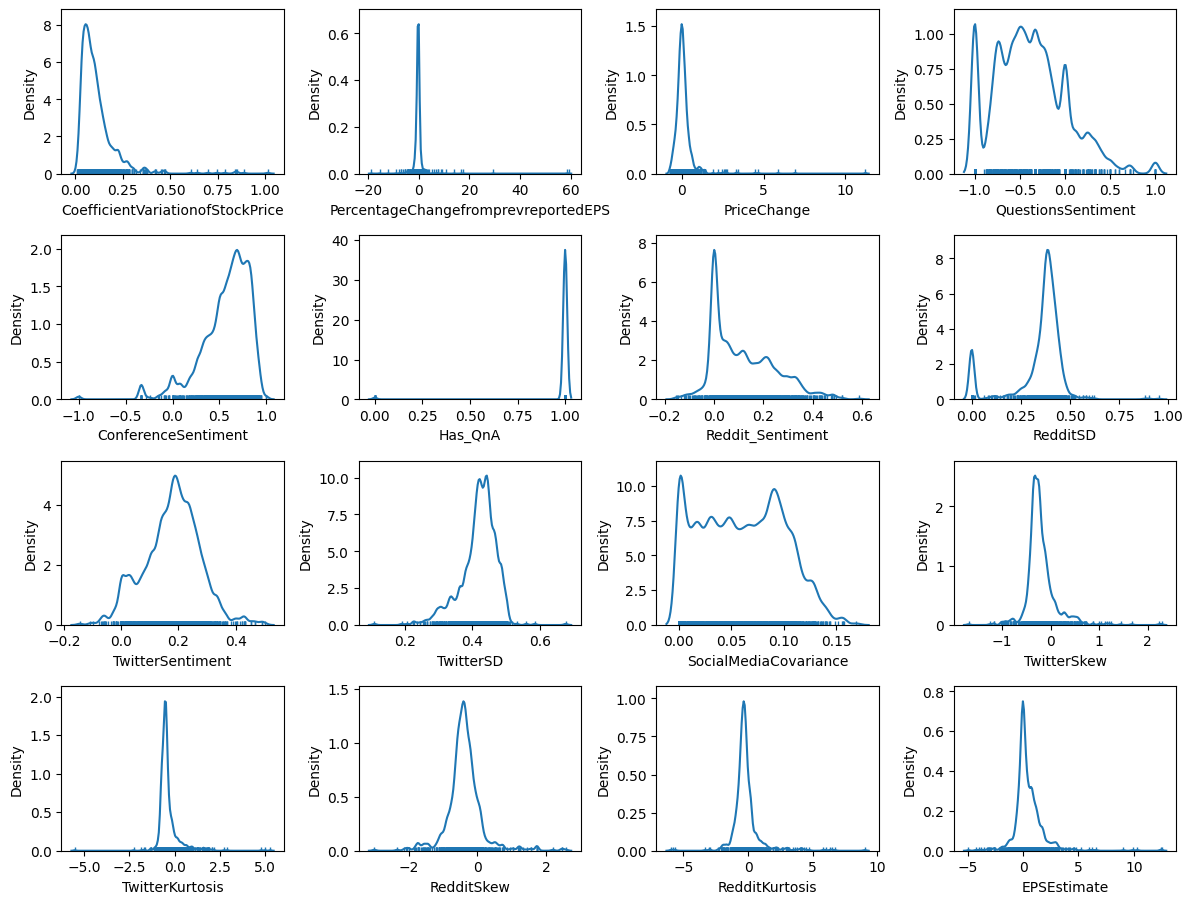

In [46]:
fig = plt.figure(figsize=(12,20))
for i in range(len(numerical_features.columns)):
    fig.add_subplot(9,4,i+1)
    sns.distplot(numerical_features.iloc[:,i].dropna(), rug=True, hist=False, label='UW', kde_kws={'bw':0.1})
    plt.xlabel(numerical_features.columns[i])
plt.tight_layout()
plt.show()

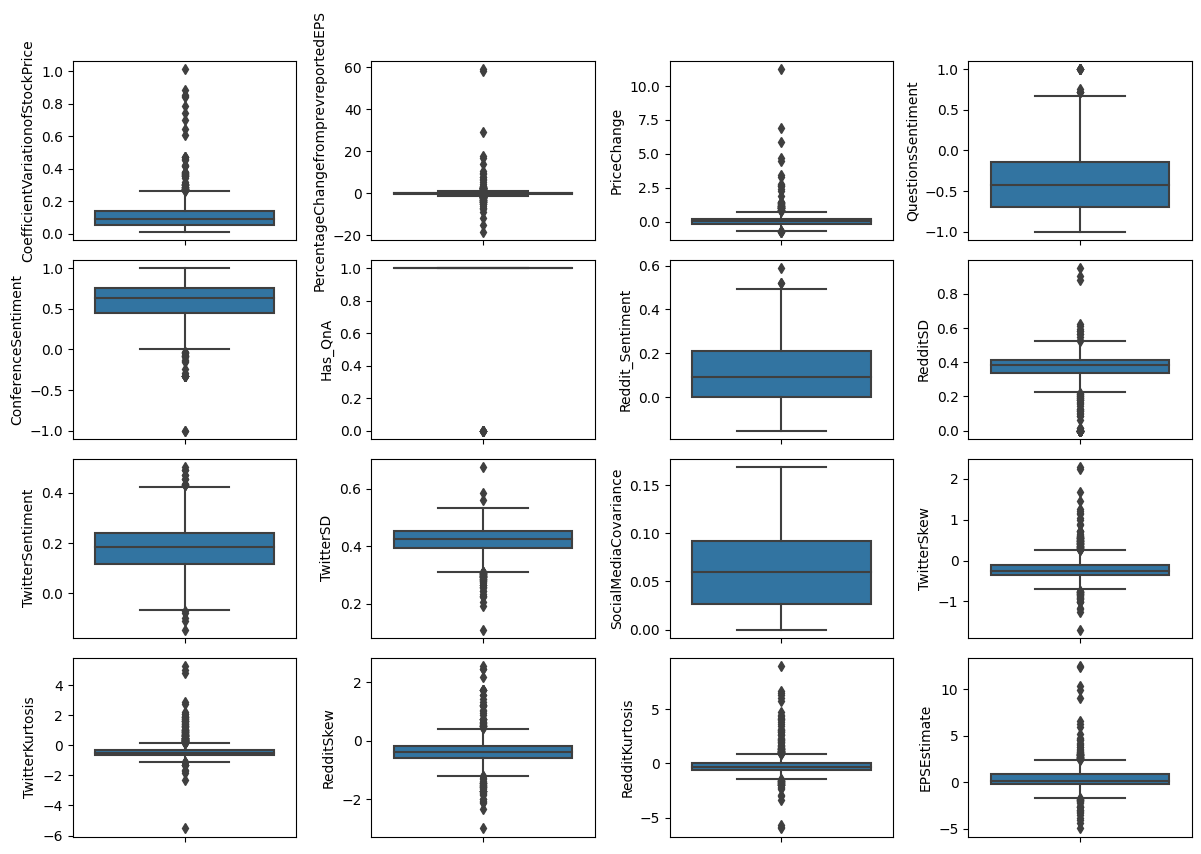

In [47]:
fig = plt.figure(figsize=(12,18))
for i in range(len(numerical_features.columns)):
    fig.add_subplot(9,4,i+1)
    sns.boxplot(y=numerical_features.iloc[:,i])

plt.tight_layout()
plt.show()

<AxesSubplot:title={'center':'High Correlation'}>

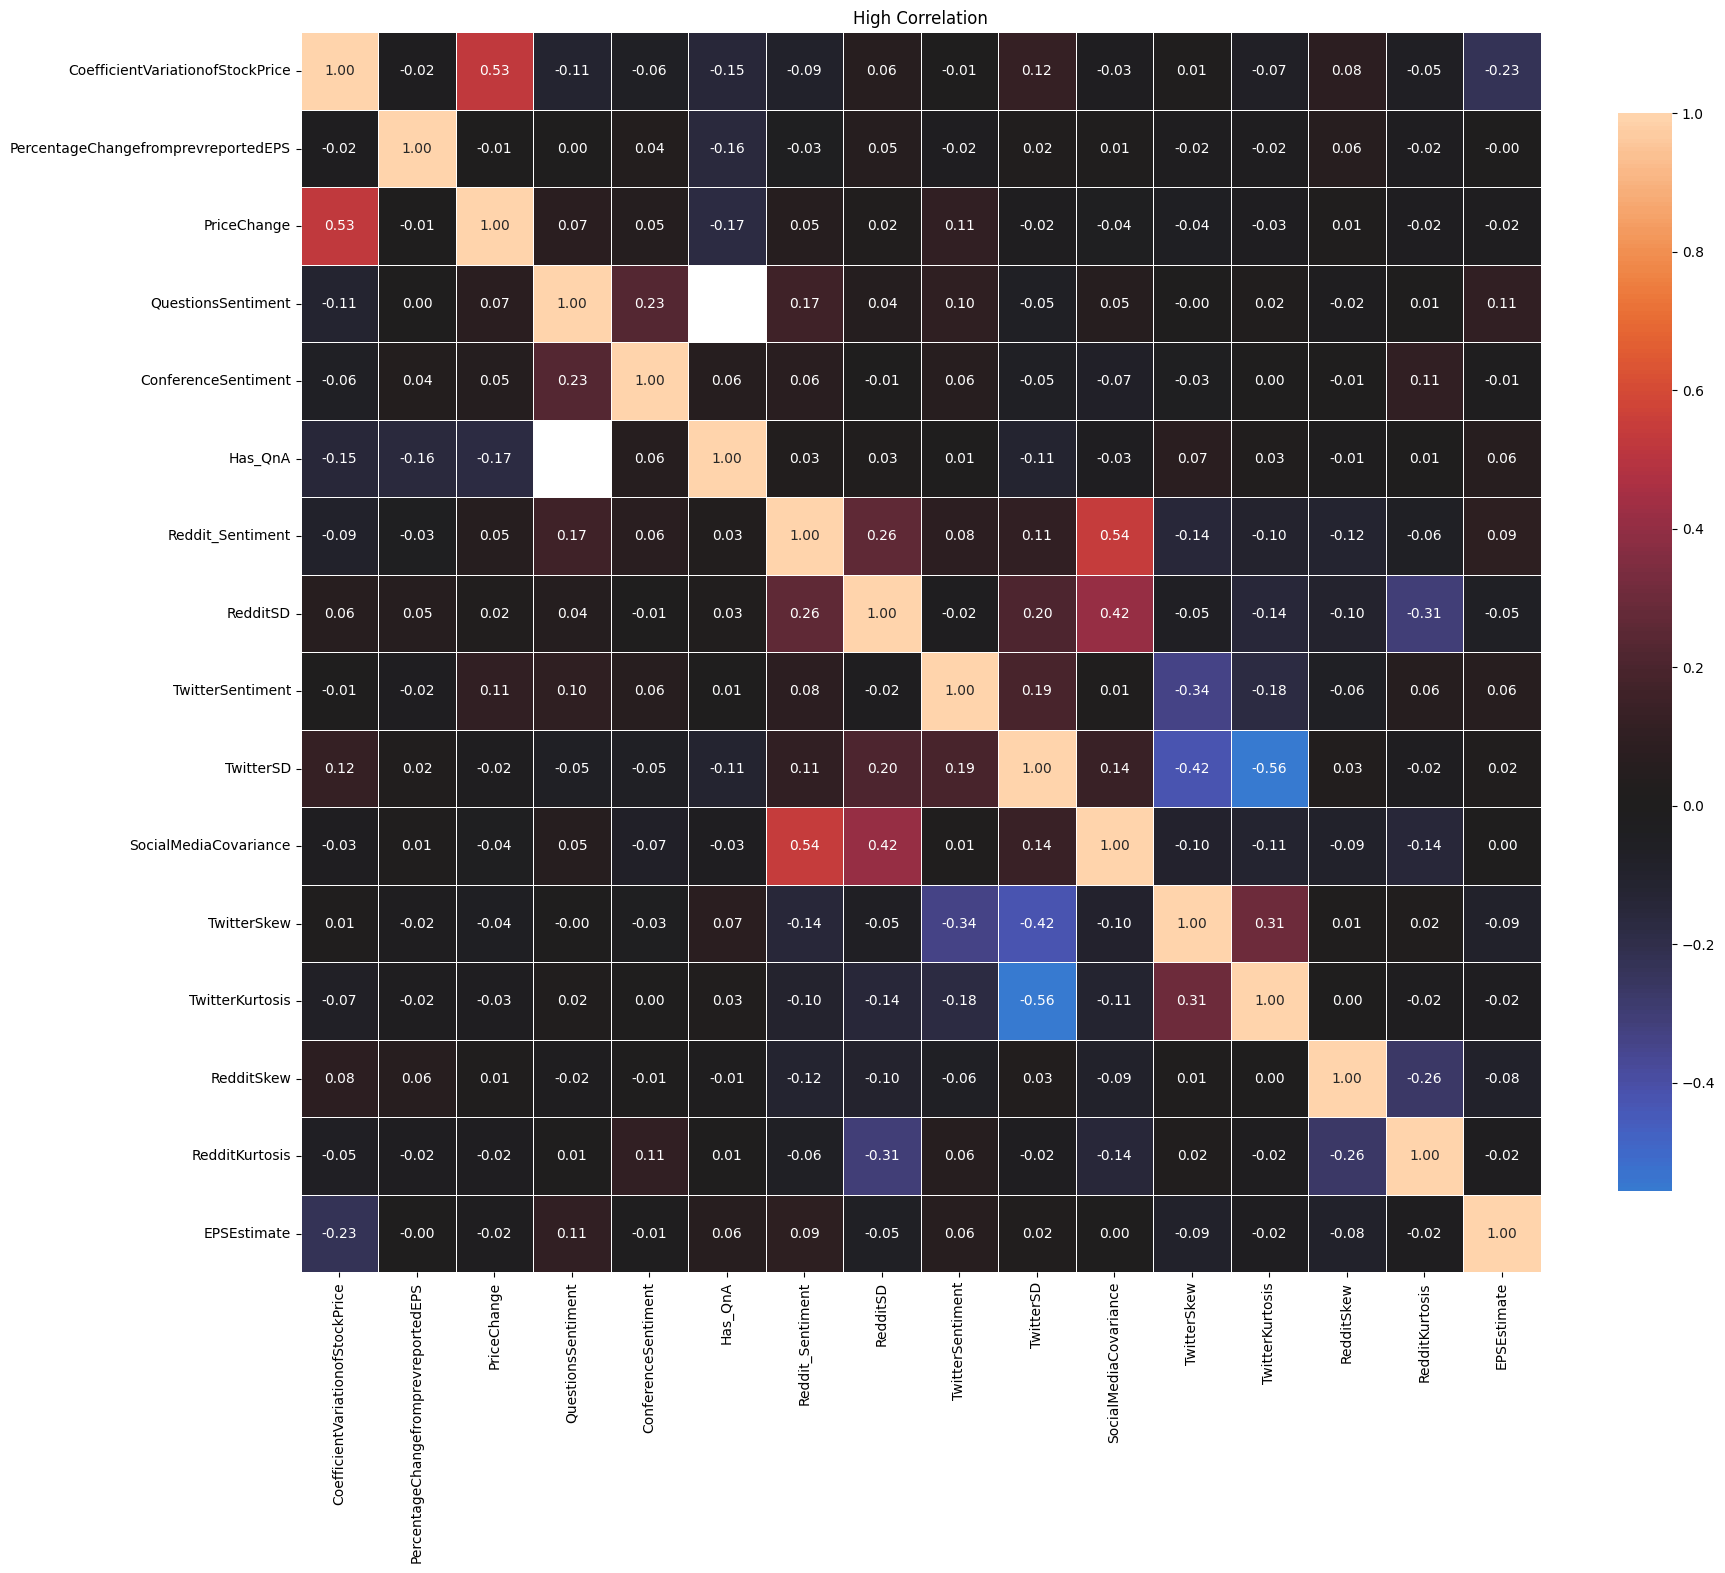

In [48]:
#Check for correlation
num_correlation = X_EDA.select_dtypes(exclude='object').corr()
plt.figure(figsize=(20,20))
plt.title('High Correlation')
sns.heatmap(num_correlation, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})

In [49]:
na_list = X.columns[X.isna().any()].tolist()

# Train-Test Split

In [50]:
TARGET = 'EPSBeats'

In [51]:
CATEGORICAL_COLS = ['quarter', 'Sector']

In [52]:
X = df[all_features]

In [53]:
X['EarningsDate'] = pd.to_datetime(X['EarningsDate'])

In [54]:
X['quarter'] = X['EarningsDate'].dt.quarter

In [55]:
X.drop(columns = ['EarningsDate'], inplace = True)

In [56]:
X.columns

Index(['CoefficientVariationofStockPrice',
       'PercentageChangefromprevreportedEPS', 'PriceChange',
       'QuestionsSentiment', 'ConferenceSentiment', 'Has_QnA',
       'Reddit_Sentiment', 'RedditSD', 'TwitterSentiment', 'TwitterSD',
       'SocialMediaCovariance', 'TwitterSkew', 'TwitterKurtosis', 'RedditSkew',
       'RedditKurtosis', 'EPSEstimate', 'Sector', 'Ticker', 'quarter'],
      dtype='object')

In [57]:
X.shape

(979, 19)

In [58]:
y = df[TARGET]
y.shape

(979,)

In [59]:
X['Has_Earning_Call'] = 1

In [60]:
X = X.rename(columns = {'Has_QnA':'QnA_Imputed'})

In [61]:
X.loc[X['QnA_Imputed'].isna(),'Has_Earning_Call'] = 0

In [62]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

In [63]:
X_train.shape, X_test.shape

((783, 20), (196, 20))

In [64]:
y_train.shape, y_test.shape

((783,), (196,))

In [65]:
X_train

,CoefficientVariationofStockPrice,PercentageChangefromprevreportedEPS,PriceChange,QuestionsSentiment,ConferenceSentiment,QnA_Imputed,Reddit_Sentiment,RedditSD,TwitterSentiment,TwitterSD,SocialMediaCovariance,TwitterSkew,TwitterKurtosis,RedditSkew,RedditKurtosis,EPSEstimate,Sector,Ticker,quarter,Has_Earning_Call
470,0.307267,-0.557576,1.409556,-0.714286,0.578947,1.0,0.068178,0.423146,0.219354,0.441965,0.055120,-0.322912,-0.535554,-0.178660,-0.176480,-0.73,Communication Services,FUBO,1,1
596,0.242076,0.306452,1.378303,-0.666667,0.466667,1.0,0.062141,0.433917,0.082585,0.451483,0.066074,-0.433410,-0.526521,-0.443640,-0.886076,0.81,Energy,FANG,1,1
514,0.043960,0.057471,-0.009751,-0.750000,0.652174,1.0,0.000000,0.000000,0.415066,0.440203,NaN,-0.602877,-0.460643,NaN,NaN,0.92,Communication Services,WBD,1,1
559,0.106001,0.000000,-0.025346,-0.714286,0.566667,1.0,0.219251,0.441184,0.145072,0.412363,0.055294,-0.290262,-0.526019,-0.239591,-0.767725,0.07,Technology,NOK,4,1
256,0.036320,-0.256881,-0.100652,-0.272727,0.761905,1.0,0.203557,0.318592,0.213863,0.434037,0.061983,-0.327149,-0.460767,-0.676016,0.665782,0.81,Technology,INTC,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,0.078014,-0.906250,0.114644,-0.333333,0.555556,1.0,0.089879,0.420355,0.032813,0.309138,0.151497,0.485133,0.993079,0.128966,-0.458910,-0.06,Consumer Cyclical,FAT,2,1
735,0.105664,0.105263,-0.402886,-0.272727,0.696970,1.0,0.141945,0.422794,0.138581,0.485417,0.032327,-0.194412,-0.693961,-0.397719,-1.212411,0.42,Technology,DOCU,3,1
768,0.218293,-0.257143,0.484055,0.200000,0.673469,1.0,0.345041,0.405775,0.127045,0.399143,0.067334,-0.029306,-0.206934,-0.454852,-0.286389,0.78,Technology,HEAR,1,1
756,0.096284,-0.536232,0.192951,-0.500000,0.777778,1.0,0.000000,0.177206,0.264362,0.402587,0.000000,-0.357813,-0.379327,0.738852,-1.898557,0.32,Consumer Cyclical,WW,1,1


In [66]:
X_train.reset_index(drop = True, inplace = True)
X_test.reset_index(drop = True, inplace = True)

In [67]:
X_train

,CoefficientVariationofStockPrice,PercentageChangefromprevreportedEPS,PriceChange,QuestionsSentiment,ConferenceSentiment,QnA_Imputed,Reddit_Sentiment,RedditSD,TwitterSentiment,TwitterSD,SocialMediaCovariance,TwitterSkew,TwitterKurtosis,RedditSkew,RedditKurtosis,EPSEstimate,Sector,Ticker,quarter,Has_Earning_Call
0,0.307267,-0.557576,1.409556,-0.714286,0.578947,1.0,0.068178,0.423146,0.219354,0.441965,0.055120,-0.322912,-0.535554,-0.178660,-0.176480,-0.73,Communication Services,FUBO,1,1
1,0.242076,0.306452,1.378303,-0.666667,0.466667,1.0,0.062141,0.433917,0.082585,0.451483,0.066074,-0.433410,-0.526521,-0.443640,-0.886076,0.81,Energy,FANG,1,1
2,0.043960,0.057471,-0.009751,-0.750000,0.652174,1.0,0.000000,0.000000,0.415066,0.440203,NaN,-0.602877,-0.460643,NaN,NaN,0.92,Communication Services,WBD,1,1
3,0.106001,0.000000,-0.025346,-0.714286,0.566667,1.0,0.219251,0.441184,0.145072,0.412363,0.055294,-0.290262,-0.526019,-0.239591,-0.767725,0.07,Technology,NOK,4,1
4,0.036320,-0.256881,-0.100652,-0.272727,0.761905,1.0,0.203557,0.318592,0.213863,0.434037,0.061983,-0.327149,-0.460767,-0.676016,0.665782,0.81,Technology,INTC,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778,0.078014,-0.906250,0.114644,-0.333333,0.555556,1.0,0.089879,0.420355,0.032813,0.309138,0.151497,0.485133,0.993079,0.128966,-0.458910,-0.06,Consumer Cyclical,FAT,2,1
779,0.105664,0.105263,-0.402886,-0.272727,0.696970,1.0,0.141945,0.422794,0.138581,0.485417,0.032327,-0.194412,-0.693961,-0.397719,-1.212411,0.42,Technology,DOCU,3,1
780,0.218293,-0.257143,0.484055,0.200000,0.673469,1.0,0.345041,0.405775,0.127045,0.399143,0.067334,-0.029306,-0.206934,-0.454852,-0.286389,0.78,Technology,HEAR,1,1
781,0.096284,-0.536232,0.192951,-0.500000,0.777778,1.0,0.000000,0.177206,0.264362,0.402587,0.000000,-0.357813,-0.379327,0.738852,-1.898557,0.32,Consumer Cyclical,WW,1,1


In [68]:
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoded_cols = ohe.fit_transform(X_train[CATEGORICAL_COLS])
df_enc = pd.DataFrame(encoded_cols, columns=ohe.get_feature_names(CATEGORICAL_COLS))
X_train = pd.concat([X_train, df_enc], axis = 1)
X_train = X_train.drop(columns = CATEGORICAL_COLS)

In [69]:
encoded_cols = ohe.transform(X_test[CATEGORICAL_COLS])
df_enc = pd.DataFrame(encoded_cols, columns= ohe.get_feature_names(CATEGORICAL_COLS))
X_test = X_test.join(df_enc)
X_test = X_test.drop(columns = CATEGORICAL_COLS)

In [70]:
X_test

,CoefficientVariationofStockPrice,PercentageChangefromprevreportedEPS,PriceChange,QuestionsSentiment,ConferenceSentiment,QnA_Imputed,Reddit_Sentiment,RedditSD,TwitterSentiment,TwitterSD,...,quarter_4,Sector_Communication Services,Sector_Consumer Cyclical,Sector_Consumer Defensive,Sector_Energy,Sector_Financial Services,Sector_Healthcare,Sector_Industrials,Sector_Real Estate,Sector_Technology
0,0.032767,1.098901,-0.064044,-0.800000,0.317073,1.0,0.002183,0.334780,0.282304,0.454700,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.099352,-0.088496,0.051536,-0.375000,0.920000,1.0,0.273456,0.421577,0.238702,0.499043,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.036594,-0.116935,-0.073467,0.714286,0.660377,1.0,0.299462,0.393418,0.154068,0.459212,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.101916,-0.546980,-0.072353,-0.500000,-0.032258,1.0,0.008781,0.000000,0.032722,0.413595,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.061777,-1.003236,-0.151573,0.250000,0.692308,1.0,0.001641,0.339991,0.297065,0.442058,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,0.086671,0.333333,0.418959,0.666667,0.794872,1.0,0.042335,0.389520,0.234186,0.450616,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
192,0.122786,-0.676923,0.346645,-0.333333,0.708333,1.0,0.038527,0.392747,0.105650,0.489679,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193,0.123724,-0.153846,0.553287,-0.142857,0.913043,1.0,-0.006287,0.446700,0.096670,0.284823,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
194,0.787128,-0.500000,5.893536,-0.750000,0.600000,1.0,0.216512,0.381458,0.268248,0.404546,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [71]:
X_train.to_csv('../data/train.csv', index = False)
y_train.to_csv('../data/train_labels.csv',index = False)
X_test.to_csv('../data/test.csv', index = False)
y_test.to_csv('../data/test_labels.csv', index = False)